In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [13]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
X_test.shape

(10000, 32, 32, 3)

In [36]:
y_train.shape

(50000, 1)

In [37]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [38]:
y_train = y_train.reshape(-1, )  # -1 if we don't want to change size(5000)
y_train[:5]       # Reshape to 1d

array([6, 9, 9, 4, 1], dtype=uint8)

In [34]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [39]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

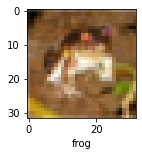

In [45]:
plot_sample(X_train, y_train, 0)

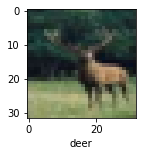

In [46]:
plot_sample(X_train, y_train, 343)

In [47]:
X_train = X_train / 255   #Sampling
X_test = X_test / 255

In [48]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 79s 50ms/step - loss: 1.8150 - accuracy: 0.3526
Epoch 2/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.6239 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.5438 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4830 - accuracy: 0.4762
Epoch 5/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.4350 - accuracy: 0.4951


In [50]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.70      0.50      1000
           1       0.74      0.35      0.48      1000
           2       0.43      0.23      0.30      1000
           3       0.37      0.34      0.36      1000
           4       0.38      0.50      0.44      1000
           5       0.55      0.21      0.30      1000
           6       0.43      0.69      0.53      1000
           7       0.66      0.39      0.49      1000
           8       0.55      0.67      0.60      1000
           9       0.51      0.59      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



In [53]:
cnn = models.Sequential([
    layers.Conv2D(filters= 32, kernel_size=(3, 3), activation="relu", input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size =(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [54]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4989 - accuracy: 0.4639
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1448 - accuracy: 0.5999
Epoch 3/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0107 - accuracy: 0.6490
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9276 - accuracy: 0.6767
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.8602 - accuracy: 0.7025
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8004 - accuracy: 0.7224
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7504 - accuracy: 0.7387
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7143 - accuracy: 0.7522
Epoch 9/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6779 - accuracy: 0.7631
Epoch 10/10
1563/1563 [==============================] - 24s 15m

In [56]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9416 - accuracy: 0.6910


[0.9416448473930359, 0.6909999847412109]

In [57]:
y_pred = cnn.predict(X_test)
y_pred[:5]


array([[4.50068415e-04, 2.80471340e-05, 6.88634522e-04, 9.43557143e-01,
        6.72500813e-04, 4.99828570e-02, 1.33792951e-03, 6.41647202e-05,
        3.16168554e-03, 5.70826742e-05],
       [9.59911197e-03, 3.58959705e-01, 5.40016445e-05, 2.85487440e-05,
        1.41165301e-05, 3.62086183e-07, 2.56705135e-07, 2.66281234e-07,
        6.28372312e-01, 2.97137280e-03],
       [1.10525161e-01, 3.51852626e-01, 1.03021087e-02, 1.66422948e-01,
        4.22384329e-02, 7.06740282e-03, 3.18541797e-03, 5.48255555e-02,
        2.32468247e-01, 2.11120527e-02],
       [7.69909263e-01, 4.10237210e-03, 7.00008720e-02, 7.44857872e-03,
        6.03607995e-03, 2.52641970e-04, 2.52229336e-04, 2.57874981e-05,
        1.41894534e-01, 7.75796725e-05],
       [1.15236708e-05, 2.89673008e-05, 1.99398287e-02, 4.75263819e-02,
        8.10586393e-01, 3.74892098e-03, 1.17909595e-01, 1.73839198e-05,
        2.30500460e-04, 5.25200278e-07]], dtype=float32)

In [58]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [59]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)